<a href="https://colab.research.google.com/github/ljanastas/PADP-9200-Ethics-and-Algorithms/blob/master/problem_set_2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PADP 9200** Problem Set 2 Solutions

For this assignment, please submit EITHER a .r or .Rmd file via the ELC by Wednesday, February 13th by 5:00pm. If you would like you can use this .Rmd file as a template and fill in the code.

The dataset that we will be working with is the **CDC BRFSS dataset** described below.

*The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data.

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

We begin by loading the data set of 20,000 observations into the R workspace. After launching RStudio, enter the following command.*



In [0]:
# Load the dataset
source("http://www.openintro.org/stat/data/cdc.R")

head(cdc)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
1,good,0,1,0,70,175,175,77,m
2,good,0,1,1,64,125,115,33,f
3,good,1,1,1,60,105,105,49,f
4,good,1,1,0,66,132,124,42,f
5,very good,0,1,0,61,150,130,55,f
6,very good,1,1,0,64,114,114,55,f


**Question 1**
How many observations are there in this data set? How many variables? For each variable, identify its data type (e.g. integer, factor).



In [0]:
dim(cdc)

[1] 20000     9

**Question 2**
Create a numerical summary for height and age, and compute the interquartile range for each. Compute the relative frequency distribution for gender and exerany. How many males are in the sample? What proportion of the sample reports being in excellent health?

In [0]:
# Create a numerical summary of height and age?
summary(cdc$height)
summary(cdc$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.00   64.00   67.00   67.18   70.00   93.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   31.00   43.00   45.07   57.00   99.00 

In [0]:
attach(cdc)
summary(height)
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.00   64.00   67.00   67.18   70.00   93.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   31.00   43.00   45.07   57.00   99.00 

In [0]:
summary(height)[5] # 3rd quartile for height
summary(height)[2] # 1st quartile for height

3rd Qu. 
     70 

1st Qu. 
     64 

In [0]:
# Compute IQR for height and age

IQR.height = as.numeric(summary(height)[5] - summary(height)[2])

# Create an IQR function 
compute.IQR = function(x){
  iqr.temp = as.numeric(summary(x)[5] - summary(x)[2])
  return(iqr.temp)
}

compute.IQR(age)
compute.IQR(height)

[1] 26

[1] 6

In [0]:
# Frequency distribution for gender and exerany
# Solution 1
table(gender)
table(exerany)

gender
    m     f 
 9569 10431 

exerany
    0     1 
 5086 14914 

In [0]:
# % of each category (Solution 2)
table(gender)/length(gender) # % of men and women
table(exerany)/length(exerany)

gender
      m       f 
0.47845 0.52155 

exerany
     0      1 
0.2543 0.7457 

In [0]:
# % of each category (Solution 3)
prop.table(table(gender))
prop.table(table(exerany))

gender
      m       f 
0.47845 0.52155 

exerany
     0      1 
0.2543 0.7457 

In [0]:
#How many males are in the sample? 
# 9569 Males in the sample

#What proportion of the sample reports being in excellent health? 23.3%
table(genhlth)/length(genhlth)

genhlth
excellent very good      good      fair      poor 
  0.23285   0.34860   0.28375   0.10095   0.03385 

**Question 3**
Create a new data frame called under23_and_smoke that contains all observations of respondents under the age of 23 that have smoked 100 cigarettes in their lifetime. Write the command you used to create the new object as the answer to this exercise.



In [0]:
under23_or_smoke = cdc[(age < 23)|(smoke100 ==1),] # This would give me a 
# subset of people under 23 OR (|) smoke 100 cigarettes or more in their lifetime

dim(under23_or_smoke)

# People under 23 AND  (&) smoke 100 cigarettes or more 
under23_and_smoke =  cdc[(age < 23)&(smoke100 ==1),]

dim(under23_and_smoke)

# Using subset
# People under 23 AND  (&) smoke 100 cigarettes or more 
under23_and_smoke =  subset(cdc,(age < 23)&(smoke100 ==1))
dim(under23_and_smoke)


[1] 10436     9

[1] 620   9

[1] 620   9

**Question 4**
Let’s consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the data frame and assigning them to a new object called wdiff.

What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person’s weight and desired weight. What if wdiff is positive or negative?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-300.00  -21.00  -10.00  -14.59    0.00  500.00 

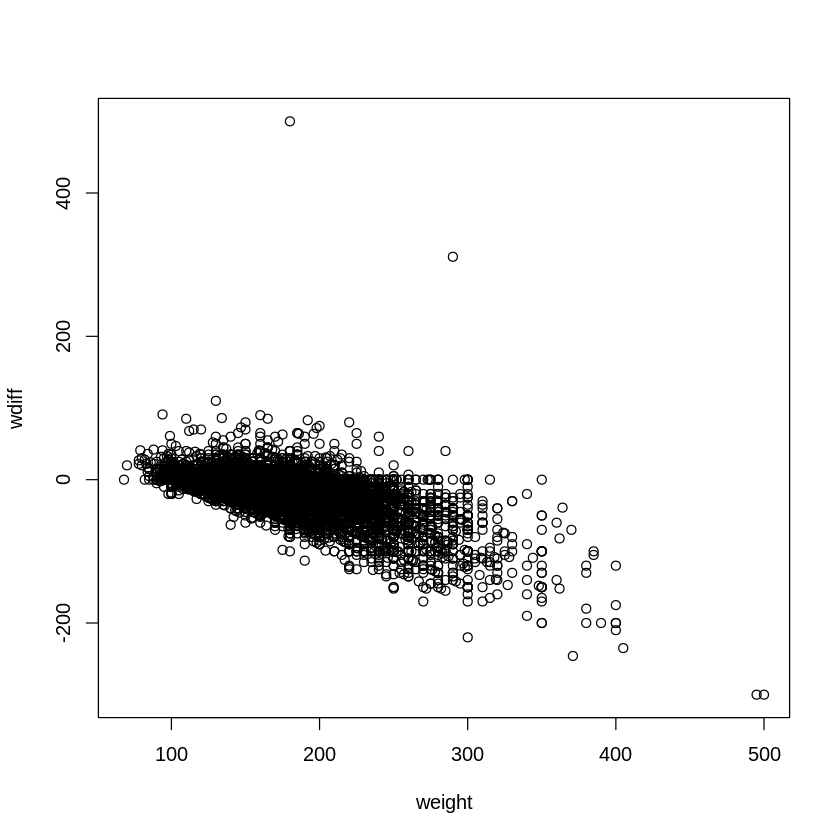

In [0]:
wdiff = wtdesire - weight
summary(wdiff)
plot(weight,wdiff)



*   What type of data is wdiff? *Answer*: This is numeric data.
*   If an observation wdiff is 0, what does this mean about the person’s weight and desired weight. *Answer*: This means that they are at their desired weight.
*   What if wdiff is positive or negative? *Answer*: If positive wdiff means that they want to gain weight. If negative this means that they want to LOSE weight.





# Note about Boolean operators


*   "==" - is equal to?
*   "|" - or
*   "&" - and
*   "<", ">" - less than, greater than.
*   "<=", ">=" - less than or equalts, greater than or equals.





In [0]:

# Just for fun, summarize wdiff for men and women
summary(wdiff[gender == "m"]) # Wdiff for men
summary(wdiff[gender == "f"]) # wdiff for women
 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-300.00  -20.00   -5.00  -10.71    0.00  500.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-300.00  -27.00  -10.00  -18.15    0.00   83.00 

**Question 5**
Health insurance companies are very interested in predicting who is more likely to be a smoker and want you to build a model that predicts whether someone is a smoker using the smoke100 as the target or outcome and all of the other variables as features or covariates.

To start this process, you have to divide your data into a training and a testing dataset. Please create two dataframes:

smoker_train which contains a random sample of 50% of the observations that you will use to train the algorithms

smoker_test which contains a random sample of the remaining observations which will be used to assess performance of your algorithms.

Please report the code used to produce these two datasets.



In [0]:
index = sample(1:20000) # Generates the randomized indices.
# Create the training data
smoker_train = cdc[index[1:9999],] # Training data
smoker_test = cdc[index[10000:20000],] # Test data

dim(smoker_train)
dim(smoker_test)

[1] 9999    9

[1] 10001     9

**Question 6** Using the smoker_train data ONLY, estimate a linear regression model based on the prediction model mentioned in Question 5 and report the regression table in your results.

In the code below I provide an example of how to estimate a regression model and report results.



In [0]:
## CODE FOR QUESTION 6

# Example of a regression model using the full dataset
#sample.model = lm(smoke100~exerany+height + weight, data=cdc) # This estmiates the model

# This produces the output
#summary(sample.model)

# Estimate a linear model using only the smoker_train dataset
smoker.train.model = lm(smoke100 ~ ., data = smoker_train)
summary(smoker.train.model)



Call:
lm(formula = smoke100 ~ ., data = smoker_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8908 -0.4535 -0.3035  0.5027  0.8043 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.2596760  0.1257299  -2.065   0.0389 *  
genhlthvery good  0.0809994  0.0132610   6.108 1.05e-09 ***
genhlthgood       0.1200777  0.0141023   8.515  < 2e-16 ***
genhlthfair       0.1418924  0.0191118   7.424 1.23e-13 ***
genhlthpoor       0.2568843  0.0291465   8.814  < 2e-16 ***
exerany          -0.0029418  0.0116081  -0.253   0.7999    
hlthplan         -0.0792350  0.0150808  -5.254 1.52e-07 ***
height            0.0121799  0.0020073   6.068 1.34e-09 ***
weight            0.0001954  0.0002102   0.929   0.3527    
wtdesire         -0.0014769  0.0003474  -4.251 2.15e-05 ***
age               0.0031431  0.0003026  10.386  < 2e-16 ***
genderf          -0.0952708  0.0151157  -6.303 3.05e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’